# 探索的データ分析

## 読み込み

In [68]:
'''main'''
import pandas as pd
import numpy as np

'''data prep'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split

'''modeling'''
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

'''data viz'''
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# データセットを読み込む

df = pd.read_csv('../data/raw/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


| column name | カラム名 |
|:----------------:|:----------:|
| fixed acidity	| 固定酸味	|
| volatile acidity | 揮発性の酸性度 |
| citric acid |	クエン酸 |
| residual sugar |	残糖	|
| chlorides	|	塩化物	|
| free sulfur dioxide |	無料の二酸化硫黄 |
| total sulfur dioxide | 総二酸化硫黄 |
| density |	密度 |
| pH |	pH値	|
| sulphates	|	硫酸塩	|
| alcohol |	アルコール |
| quality |	品質	|

## 集計

In [52]:
# データ量の把握

df.shape

(1599, 12)

In [53]:
# データ数のカウント(欠損があるか)

df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [54]:
# 記述統計量

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [55]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## 可視化

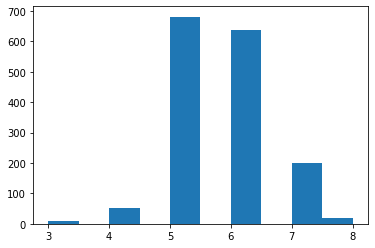

In [56]:
# qualityの可視化

plt.hist(df['quality'], bins=10);

# 特徴量作成

## カテゴリデータの作成

In [57]:
# qualityを「美味しい」などのラベルに変換する関数の定義

def delicious_score(x):
    """qualityが7以上なら美味しい(1)"""
    if x >= 7:
        return 1
    else:
        return 0

In [58]:
# applyで上記関数を使って、「美味しい」カラムを作成する

df['is_delicious'] = df['quality'].apply(delicious_score)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_delicious
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


## データの正規化

In [59]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'is_delicious'],
      dtype='object')

In [62]:
# 正規化の実施

mmscaler = pp.MinMaxScaler()
mmscaler.fit(df)

df_mms = pd.DataFrame(mmscaler.transform(df),
                      columns=df.columns
                     )

# 正しく変換されているか確認

df_mms.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_delicious
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205,0.135710
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514,0.342587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000,0.000000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000,0.000000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# データ分析

## 分類ごとの違いの集計

In [63]:
# 美味しい・おいしくないワインごとの特徴量の集計

df_mms.groupby('is_delicious').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
is_delicious,,,,,,,,,,,,
0.0,0.321843,0.292481,0.254407,0.110419,0.129016,0.213693,0.149420,0.498470,0.452454,0.188475,0.284775,0.481766
1.0,0.375841,0.195568,0.376498,0.123887,0.106699,0.182839,0.102083,0.437612,0.432127,0.247579,0.479700,0.816590


## 相関の確認

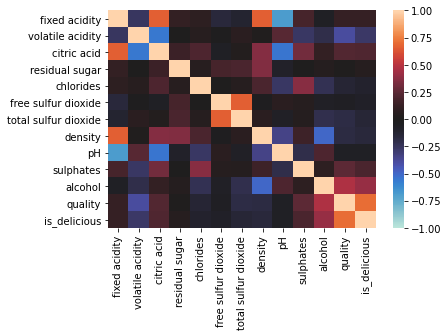

In [64]:
# 相関係数の算出

df_mms_corr = df_mms.corr()

# 結果の表示

# print(df_corr)
sns.heatmap(df_mms_corr, vmax=1, vmin=-1, center=0);

# モデリング

## データ分割

In [65]:
# 目的変数
y = df_mms["is_delicious"]

# 説明変数
X = df_mms.drop(["quality", "is_delicious"], axis=1)

## 機械学習

In [66]:
# データを学習用と検証用に分割

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=3
    )

In [69]:
# ロジスティック回帰を実施

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

## 精度検証

In [70]:
# テストデータでの精度

y_pred = log_model.predict(X_test)
print('Test accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test accuracy:  0.8875


## モデルの出力

In [72]:
# pickleのインポート
import pickle

# モデルの保存
output_dir = '../model/'
filename = 'model_lr.sav'
pickle.dump(log_model, open(output_dir + filename, 'wb'))